In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete = load_umachine_sdss_with_meert15()
no_data_mask = np.isnan(full_sdss['Magr_tot_meert15'])

mask = ~no_data_mask & behroozi_complete
sdss = full_sdss[mask]
print(sdss.keys())

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'ssfr']


In [3]:
from galsize_models.models.load_baseline_catalogs import load_umachine_mock
mock = load_umachine_mock()
print(mock.keys())

Total runtime = 0.42 seconds
18384 mock galaxies in logM* = 9.77 bin
46918 mock galaxies in logM* = 9.87 bin
42690 mock galaxies in logM* = 10.01 bin
38669 mock galaxies in logM* = 10.15 bin
35063 mock galaxies in logM* = 10.29 bin
31762 mock galaxies in logM* = 10.42 bin
27765 mock galaxies in logM* = 10.56 bin
22937 mock galaxies in logM* = 10.70 bin
17931 mock galaxies in logM* = 10.84 bin
12889 mock galaxies in logM* = 10.98 bin
8072 mock galaxies in logM* = 11.11 bin
4909 mock galaxies in logM* = 11.25 bin
2666 mock galaxies in logM* = 11.39 bin
1323 mock galaxies in logM* = 11.53 bin
580 mock galaxies in logM* = 11.67 bin
365 mock galaxies in logM* = 11.83 bin
['obs_sfr', 'icl', 'upid', 'mpeak', 'sfr', 'halo_id', 'mvir', 'rvir', 'vmax_at_mpeak', 'vx', 'a_first_infall', 'sm', 'vy', 'y', 'x', 'vz', 'z', 'dvmax_zscore', 'obs_sm', 'halo_hostid', 'host_halo_rvir', 'host_halo_mvir', 'ssfr', 'is_main_sequence', 'is_green_valley', 'is_quenched', 'logsm', 'rvir_halo_kpc', 'bt_meert15_rand

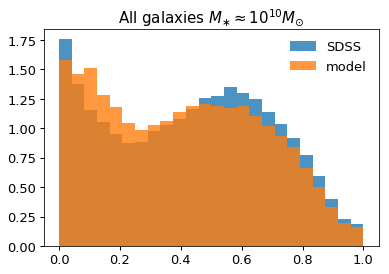

In [4]:
sm_low, sm_high = 10.5, 10.7

sdss_sm_mask = (sdss['sm'] > sm_low) & (sdss['sm'] < sm_high)
mock_sm_mask = (mock['obs_sm'] > 10**sm_low) & (mock['obs_sm'] < 10**sm_high)

fig, ax = plt.subplots(1, 1)

bt_bins = np.linspace(0, 1, 25)

__=ax.hist(sdss['bulge_to_total_rband_meert15'][sdss_sm_mask], bins=bt_bins, 
          alpha=0.8, normed=True, label='SDSS')
__=ax.hist(mock['bt_meert15_random'][mock_sm_mask], bins=bt_bins, 
          alpha=0.8, normed=True, label='model')

title = ax.set_title(r'All galaxies $M_{\ast} \approx 10^{10}M_{\odot}$')
legend = ax.legend()

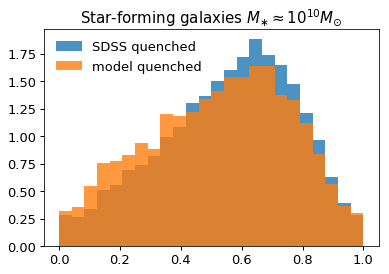

In [5]:
sm_low, sm_high = 10.7, 10.9

sdss_sm_mask = (sdss['sm'] > sm_low) & (sdss['sm'] < sm_high) 
sdss_sm_sf_mask = sdss_sm_mask & (sdss['ssfr'] > -10.75)
sdss_sm_q_mask = sdss_sm_mask & (sdss['ssfr'] < -11.25)

mock_sm_mask = (mock['obs_sm'] > 10**sm_low) & (mock['obs_sm'] < 10**sm_high)
mock_sm_sf_mask = mock_sm_mask & (mock['ssfr'] > -10.75)
mock_sm_q_mask = mock_sm_mask & (mock['ssfr'] < -11.25)

fig, ax = plt.subplots(1, 1)

bt_bins = np.linspace(0, 1, 25)

# __=ax.hist(sdss['bulge_to_total_rband_meert15'][sdss_sm_sf_mask], bins=bt_bins, 
#           alpha=0.8, normed=True, label='SDSS star-forming')
# __=ax.hist(mock['bt_meert15_random'][mock_sm_sf_mask], bins=bt_bins, 
#           alpha=0.8, normed=True, label='model star-forming')

__=ax.hist(sdss['bulge_to_total_rband_meert15'][sdss_sm_q_mask], bins=bt_bins, 
          alpha=0.8, normed=True, label='SDSS quenched')
__=ax.hist(mock['bt_meert15_random'][mock_sm_q_mask], bins=bt_bins, 
          alpha=0.8, normed=True, label='model quenched')

title = ax.set_title(r'Star-forming galaxies $M_{\ast} \approx 10^{10}M_{\odot}$')
legend = ax.legend()